# Deep Learning
Deep Learning techniques can be used to predict various outcomes including but not limited to future sales. Your task is to create a deep learning model of the Long Short Term Memory which is a type of Recurrent Neural Network .

You can use either Tensorflow or Pytorch libraries for model building. The model should not be very deep (Two layers) due to the computational requirements, it should comfortably run in google colab.

In [1]:
# importing of libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
import tensorflow as tf
import seaborn as sns
import os,sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from timeseries import TimeSeries
from deep_learner import DeepLearn
sns.set()


2022-05-28 22:21:50.995392: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-28 22:21:50.995438: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/home/martin/Documents/pharm_sales/notebooks
/home/martin/Documents/pharm_sales/notebooks
The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
train_ = pd.read_csv("../data/cleaned_train.csv")
test = pd.read_csv("../data/cleaned_test.csv")
train=train_.loc[:,train_.columns!='Sales']
train['Sales']=train_['Sales']
train = train.set_index('Date')


### Tasks
- Isolate the Rossmann Store Sales dataset into time series data


In [3]:
timeseries = TimeSeries(train)

2022-05-28 21:51:32,930:logger:Initialized the time series class


So for the conversion of the time series data, it is simple we take the date and split the data, into week, day, month, year, so that we can get a real time scope of what we are working on majorly.

- Check whether your time Series Data is Stationary

In [6]:
timeseries.perform_adfuller('Sales')

So we realize that the data is stationary because the p-value is less than 0.005

- Depending on your conclusion from 2 above difference your time series data



In [21]:
train['Sales'] = timeseries.remove_stationarity(train.Sales.values)

- Check for autocorrelation and partial autocorrelation of your data


In [28]:
acfSalesScaled = acf(train.Sales.values, fft=True, nlags=40)
acfSalesScaledArray = np.array(acfSalesScaled)

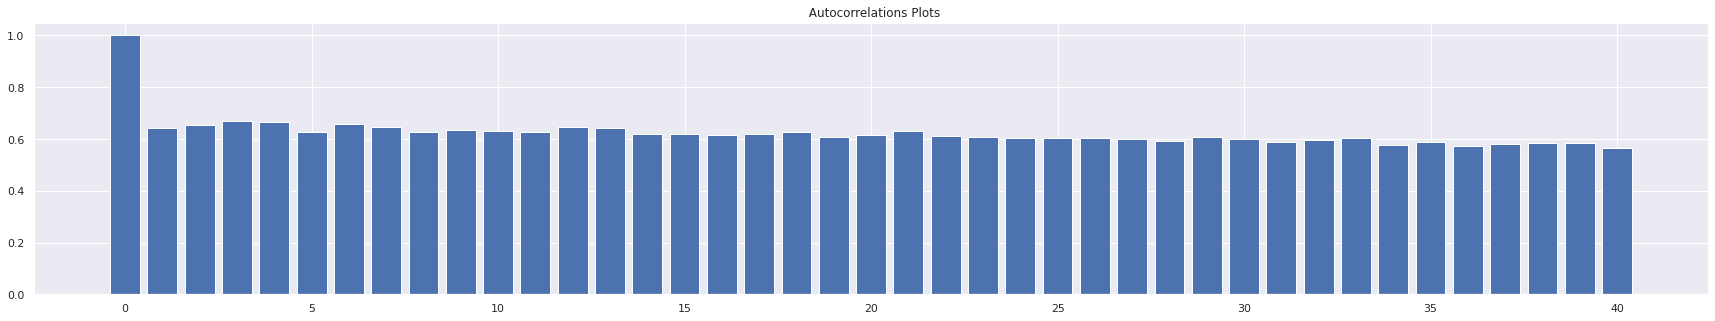

2022-05-28 21:11:44,196:logger:Successfully displayed the autocorelation plots


In [29]:
timeseries.corrPlots(acfSalesScaledArray, '')

When we plot the data we realize that there is a consistent flow, and this shows that there is a partial autocorelation in the data

- Transform the time series data into supervised learning data by creating a new y(target) column. For example as illustrated here in the Sliding Window For Time Series Data section


In [117]:
n = len(train)
train_df = train[0:int(n*0.7)]
val_df = train[int(n*0.7):int(n*0.9)]
test_df = train[int(n*0.9):]
num_features = train.shape[1]

- Build a LSTM Regression model to predict the next sale.

In [120]:
learn = DeepLearn(input_width=24, label_width=1, shift=24,epochs=5,
                    train_df=train_df, val_df=val_df, test_df=test_df,
                    label_columns=['Sales'])
model_obj = tf.keras.models.Sequential([
            # Shape [batch, time, features] => [batch, time, lstm_units]
            tf.keras.layers.LSTM(32, return_sequences=True),
            # Shape => [batch, time, features]
            tf.keras.layers.Dense(units=1)
        ])

In [5]:
forecast = learn.model(
    model_=model_obj
)

2022-05-28 21:51:33.858330: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-28 21:51:33.858384: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-28 21:51:33.858422: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (martin-HP-EliteBook-Folio-9470m): /proc/driver/nvidia/version does not exist
2022/05/28 21:51:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Epoch 1/5
7093/7093 [==============================] - 134s 18ms/step - loss: 41992464.0000 - mean_absolute_error: 5437.3071 - val_loss: 36895024.0000 - val_mean_absolute_error: 5107.6650
Epoch 2/5
7093/7093 [==============================] - 128s 18ms/step - loss: 40918856.0000 - mean_absolute_error: 5366.2339 - val_loss: 35866872.0000 - val_mean_absolute_error: 5034.2124
Epoch 3/5
7093/7093 [==============================] - 145s 20ms/step - loss: 39807912.0000 - mean_absolute_error: 5290.6553 - val_loss: 34816728.0000 - val_mean_absolute_error: 4957.4668
Epoch 4/5
7093/7093 [==============================] - 141s 20ms/step - loss: 38707756.0000 - mean_absolute_error: 5214.3921 - val_loss: 33788368.0000 - val_mean_absolute_error: 4880.8584
Epoch 5/5
7093/7093 [==============================] - 161s 23ms/step - loss: 37628160.0000 - mean_absolute_error: 5138.1748 - val_loss: 32779850.0000 - val_mean_absolute_error: 4804.2480


2022/05/28 22:03:25 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: 'MapDataset' object has no attribute '_batch_size'
2022-05-28 22:03:25,701:logger:Successfully executed the model


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

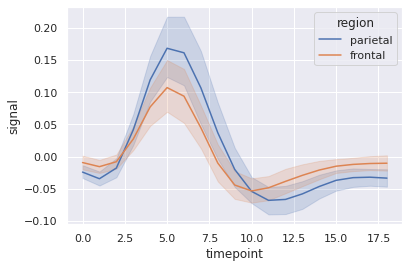

In [2]:
learn.plot(model=model_obj)

# Conclusion

We see that through the analysis the predictions and the actual are close, making our model fit enough for the analysis. What I can conclude is that there are more predictions that are closer, in the lstm model than the lightgbm or random forest regressors. Therefore I would advise that they use the lstm for the predictions of the sales.